# Exploratory Data Analysis On Haberman Dataset

#### About dataset:

The haberman dataset contains case study conducted on the survival of patients who went through the breast cancer surgery.

The case study was conducted at Univeersity of Chicago's Villings Hospital between 1958 and 1970.

#### Objective:

Perform EDA on Haberman Dataset.

In [91]:
#Importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#Reading the dataset
ds = pd.read_csv('C:/DataSets/haberman.csv')
ds.shape

(306, 4)

In [93]:
ds.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


There are 306 datapoints (patients) and 4 features.

#### Feature attributes:

Age: Age of patient at time of operatoon

Year: Year of operation

Nodes: Number of positive axillary nodes detected

Status: survival status 
    1 = Patient survuved 5 years or longer
    2 = Patient died within 5 years

In [94]:
ds['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation:
This tells us that the data is imbalanced. We have 225 patients who survived 5years and longer compared to 81 patients who died within 5 years.
This is a good thing and it tells us that the surgery is working.

## 2-D Scatter Plot

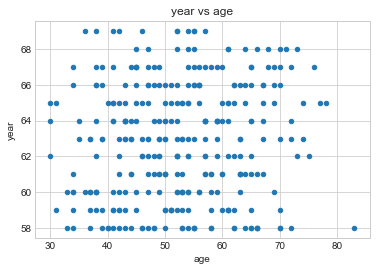

In [95]:
# Scatter plot year vs age
ds.plot(kind = 'scatter', x = 'age', y = 'year')
plt.title('year vs age')
plt.show()

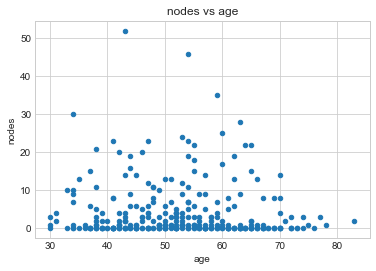

In [96]:
# Scatter plot node vs age
ds.plot(kind = 'scatter', x = 'age', y = 'nodes')
plt.title('nodes vs age')
plt.show()

### Observation:

#### Plot year vs age:

I cannot see any use of this plot.

#### Plot nodes vs age:

It can be said that between age of 33 to 70 there are many patient with more than 5 positive nodes detected.


## 2-D Scatter plot with seaborn

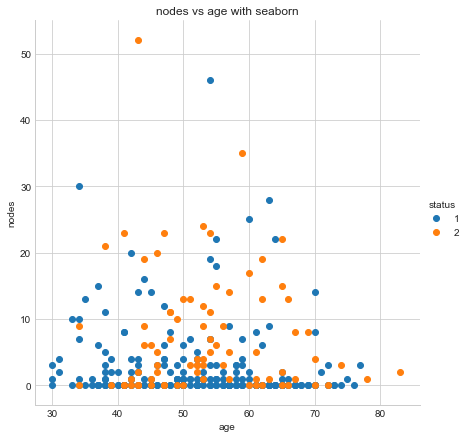

In [97]:
sns.set_style('whitegrid')
sns.FacetGrid(ds, hue = 'status', size = 6).map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('nodes vs age with seaborn')
plt.show()

### Observation:

The seaborn scatter plot of node vs age gives more clearer view of my observation made with non seaborn plot. 

## Pair plot

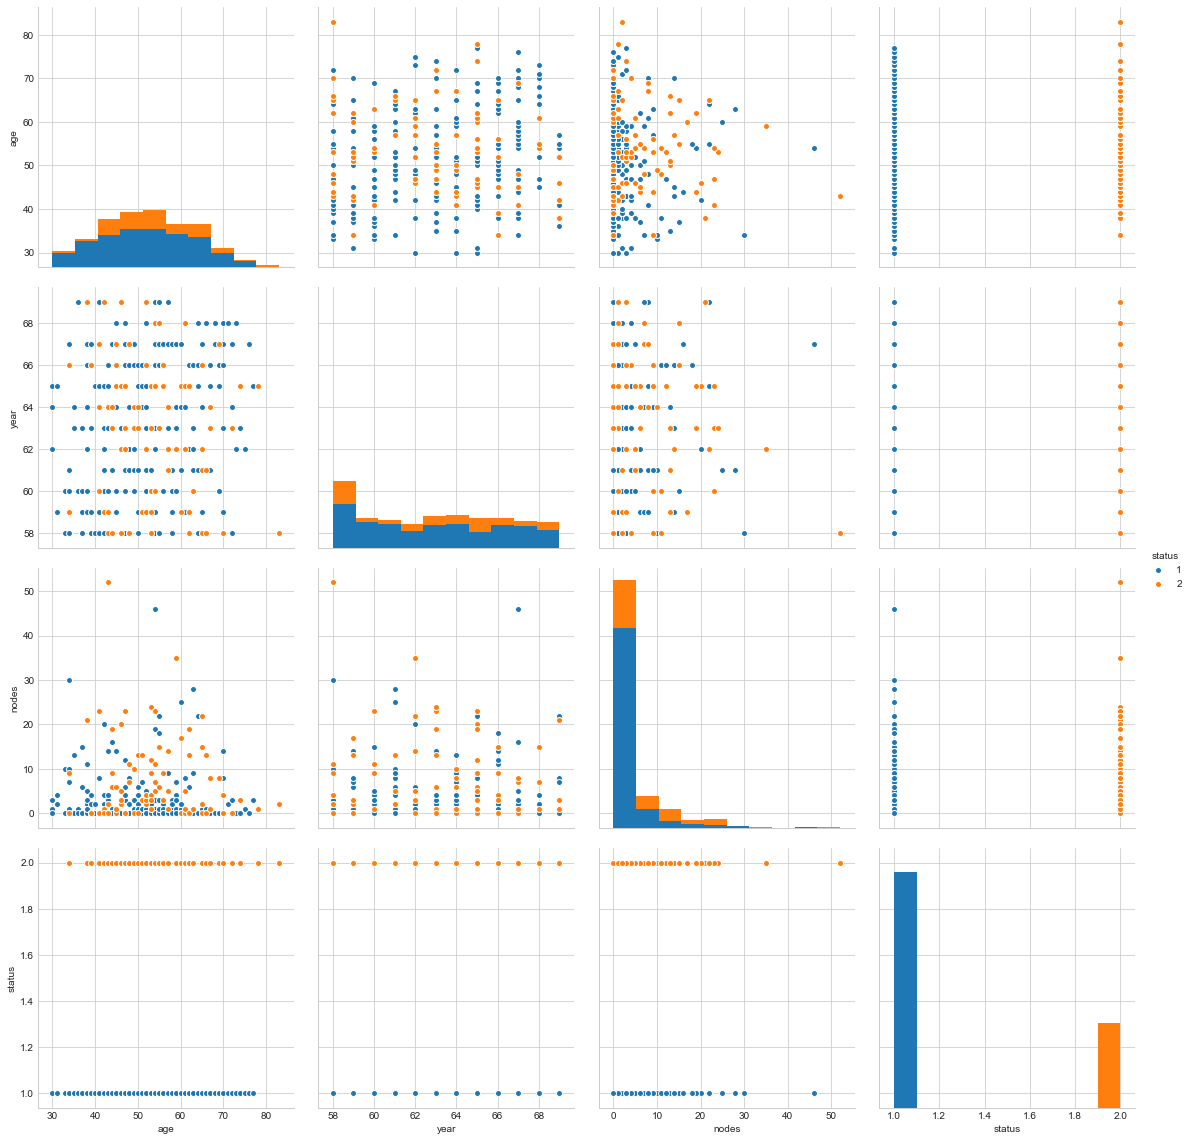

In [98]:
# Pair plot 
sns.set_style('whitegrid')
sns.pairplot(ds, hue = 'status', size = 4)
plt.show()

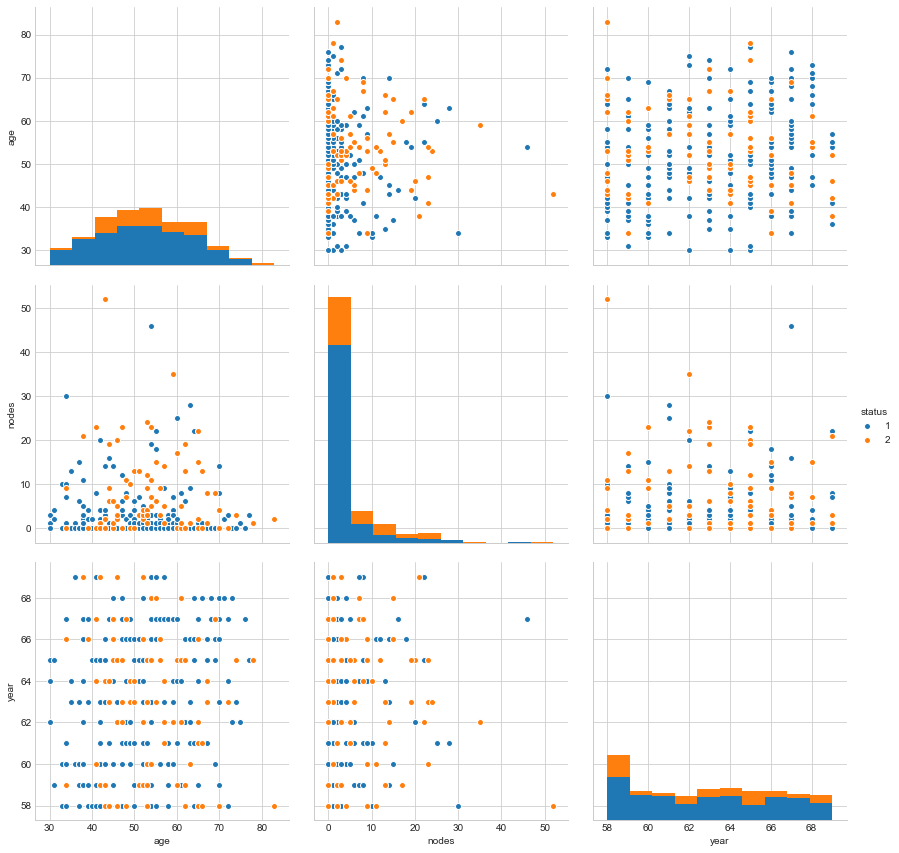

In [99]:
sns.pairplot(ds, hue = 'status', size = 4, vars = ['age', 'nodes', 'year'])

### Observation:

It is difficult to separate the patients in to their respective classes using the pair plot because the data points are bunched together.


## PDF and CDF

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Status with respect to age')

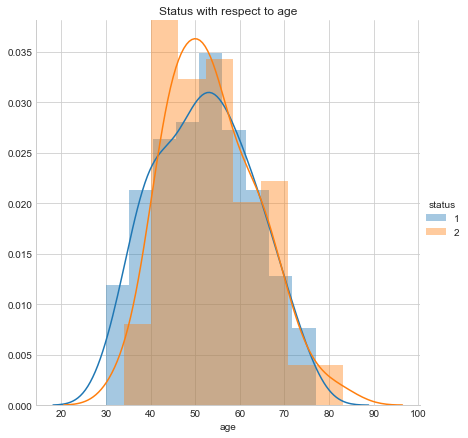

In [100]:
#Histogram with respect to age
sns.set_style('whitegrid')
sns.FacetGrid(ds, hue = 'status', size = 6).map(sns.distplot,'age').add_legend()
plt.title('Status with respect to age')


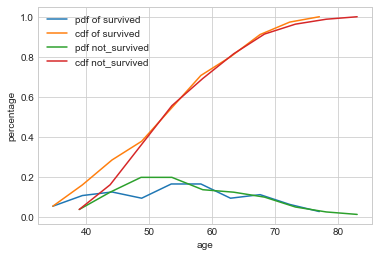

In [101]:
#Pdf and CDF with respect to age
survived = ds[ds ['status'] == 1]
not_survived = ds[ds ['status'] == 2]

#Calucating pdf and cdf of patient who survived 5 years or more
counts, bin_edges = np.histogram(survived['age'], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf of survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf of survived')

#Calucating pdf and cdf of patient who did not survive
counts, bin_edges = np.histogram(not_survived['age'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf not_survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf not_survived')
plt.xlabel ('age')
plt.ylabel('percentage')
plt.legend()
plt.show()

### Observation:
##### Status with respect to age:
The plot gives a faded idea about detection/surgery of cancer in early age. As we can see patients who have had surger between 30-35 years of age survived for 5 years or longer. We can check this using the CDF.

Looking at the CDF it becomes difficult to separate 2 classes  But it also gives the informatin that there is a higher chance of patient to survive between age of 30 to 40.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


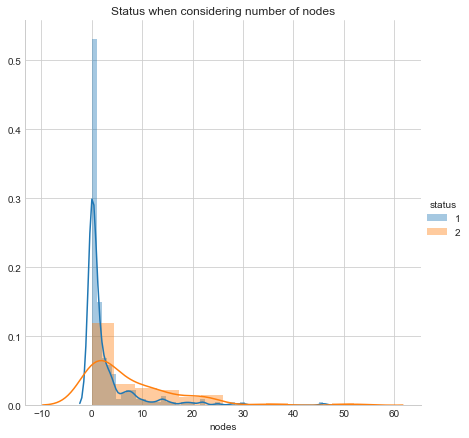

In [102]:
# Histogram with respect to nodes
sns.FacetGrid(ds, hue = 'status', size =  6).map(sns.distplot,'nodes').add_legend()
plt.title('Status when considering number of nodes')
plt.show()

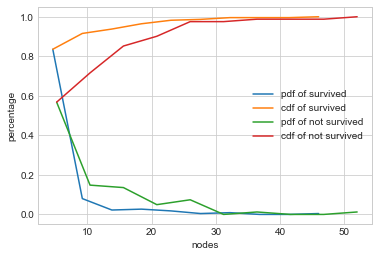

In [103]:
#Calucating pdf and cdf of patient who survived 5 years or more
counts, bin_edges = np.histogram(survived['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf of survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf of survived')

#Calucating pdf and cdf of patient who did not survive 5 years
counts, bin_edges = np.histogram(not_survived['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf of not survived')
plt.plot(bin_edges[1:], cdf, label = 'cdf of not survived')
plt.xlabel('nodes')
plt.ylabel('percentage')
plt.legend()
plt.show()

### Observation:
#### Status with respect to nodes.

There is big overlap situation here in the PDF histogram. Although we can see there is a high chance of surviving more than 5 years with less positive axillary nodes. But still there is 12% chances of not surviving which cannot be neglected.

## Box plot

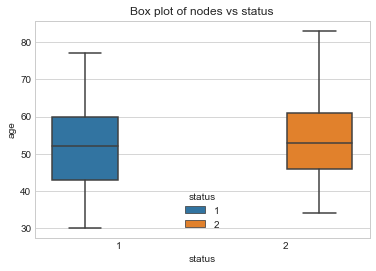

In [104]:
# box plot for age vs status
sns.boxplot(hue = 'status', x = 'status', y = 'age', data = ds)
plt.title('Box plot of nodes vs status')
plt.show()

### Observation:

#### For status = 1

The median lies at 52 or 53, the 75th percentile lies at 60 and the 25th percentile is at 42 or 43. This tells that 75% of patients who survived are less than 60 years of age.

#### For status = 2

Here the median lies at 53 or 54, the 75th percentile is at 61, and the 25th percentile is little above 45.

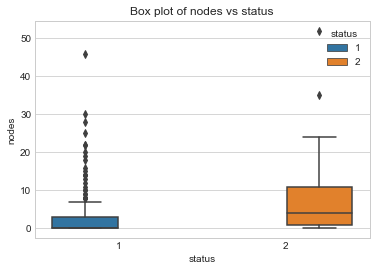

In [105]:
# Box plot of nodes vs status
sns.boxplot(hue = 'status', x = 'status', y = 'nodes', data = ds)
plt.title('Box plot of nodes vs status')
plt.show()

### Observation:

#### Combined for both status classes:

It seems like there are some outliers in the nodes detection. Also specially in the status = 1 we are not able to detect the median. We need to calculate median with some other method. While for status = 2 the median is at 4, 75th percentile is at 11 and 25th percentile is at 1.

## Violin Plot

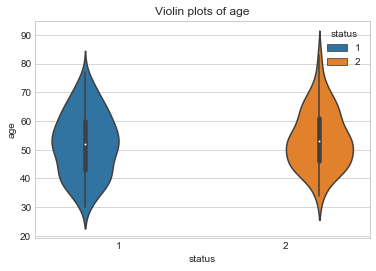

In [106]:
# Violin plot
sns.violinplot( hue = 'status', x = 'status', y = 'age', data = ds)
plt.title('Violin plots of age')
plt.show()

### Observation:

The violin plot confirms our observation made with the help of box plots.

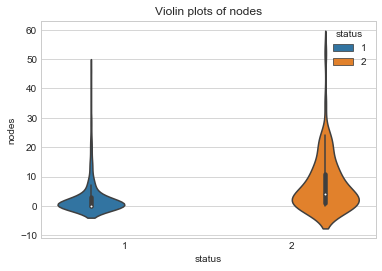

In [107]:
sns.violinplot(hue = 'status', x = 'status', y = 'nodes', data = ds)
plt.title('Violin plots of nodes')
plt.show()

### Observation:

Here we can confirm that the median for status = 1 plot lies somewhere around 2. the 75th at 11 adn the 25th percentile at 0. On the other side we can conform that our observation with box plot was correct. 

## Conclusion:

1. Most patients who survived lies between 53 to 55. Between age 30 to           40 there is no death reported.

2. Most patients that could not survive lies between age 40 to 70.

3. The survival of patients depended most on the number of nodes detected. The patients with nodes less than 5 survived most.